In [22]:
# Material last updated: 15 Oct 2022
# Note materials were designed with the Roboto Condensed font, which can be installed here: https://www.1001fonts.com/roboto-condensed-font.html

from IPython.display import HTML
HTML('''
    <style> body {font-family: "Roboto Condensed Light", "Roboto Condensed";} h2 {padding: 10px 12px; background-color: #E64626; position: static; color: #ffffff; font-size: 40px;} .text_cell_render p { font-size: 15px; } .text_cell_render h1 { font-size: 30px; } h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; position: static; color: #ffffff; font-size: 20px;} h4:before{ 
    content: "@"; font-family:"Wingdings"; font-style:regular; margin-right: 4px;} .text_cell_render h4 {padding: 8px; font-family: "Roboto Condensed Light"; position: static; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}</style>
    <script> code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script>
    <form action="javascript:code_toggle()"><input type="submit" value="Hide/show all code."></form>
''')

# Draft Product Notebook


## Purpose
Our group whants to study the trends in the week in step activity...

## Methodology
Using Pandas, Matplotlib and python.

## WIP - improvements
All code last updated: 23/10/2022

Notable TODOs:
- Literate Programming for code
- Explain each result in words
- 

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [23]:
# Data manipulation
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from pathlib import Path

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


## Suppress all warnings
Ignore all future warnings

In [24]:
import warnings
warnings.filterwarnings('ignore')


# Data import
We retrieve all the required data for the analysis.

Datasets for:
* Participant 1
* Participant 2
* Participant 3
* Participant 4
* Participant 5
* Participant 7
* Participant 8
* Rainfall
* Sun exposure

In [25]:
# Include data paths
dataset_path = Path('../../../datasets')
add_dataset_path = Path('../../../datasets/additional')
# Import datasets
raw_data_p1 = pd.read_csv(dataset_path / 'Participant-01.csv')
p1 = raw_data_p1.copy()

raw_data_p2 = pd.read_csv(dataset_path / 'Participant-02-detail.csv')
p2 = raw_data_p2.copy()

raw_data_p3 = pd.read_csv(dataset_path / 'Participant-03.csv')
p3 = raw_data_p3.copy()

raw_data_p4 = pd.read_csv(dataset_path / 'Participant-04.csv')
p4 = raw_data_p4.copy()


raw_data_p5 = pd.read_csv(dataset_path / 'Participant-05-detail.csv')
p5 = raw_data_p5.copy()

raw_data_p7 = pd.read_csv(dataset_path / 'Participant-07.csv')
p7 = raw_data_p7.copy()

raw_data_p8 = pd.read_csv(dataset_path / 'Participant-08.csv')
p8 = raw_data_p8.copy()

# for climate datasets the year month day are separated i need them to be together therefore i parsed them together
raw_data = pd.read_csv(add_dataset_path / 'rainfall_syd.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sydrain = raw_data.copy()

raw_data2 = pd.read_csv(add_dataset_path / 'solar_cent_park.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sun = raw_data2.copy()

# Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

In [26]:
# i want to create a function that subs in the dataset for the following operations so I don't have to repeat these steps
def sub(data):
#     convert start,finish columns to datetime formats
    data['Start'] = pd.to_datetime(data['Start'])
    data['Finish'] = pd.to_datetime(data['Finish'])
#     extract the weekday name, month names and date in YYYY-MM-DD format from start column
    data['WeekDay'] = data['Start'].dt.day_name()
    data['Month'] = data['Start'].dt.month_name()
    data['Year'] = data['Start'].dt.year
    data['Date'] = data['Start'].dt.date
#     convert date to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
#     week days are ordered so that it's matches the order that day of the week are.
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['WeekDay'] = data['WeekDay'].astype(cat_type)

    
# function for detail data
def subdetail(data):
#     convert date to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
#     extract week day and month from date
    data['WeekDay'] = data['Date'].dt.day_name()
    data['Month'] = data['Date'].dt.month_name()
    data['Year'] = data['Date'].dt.year
#     order week days
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['WeekDay'] = data['WeekDay'].astype(cat_type)

    

    
# function for weather dataset
def subw(data):
#     extract week day and month from date
    data['Month'] = data['Date'].dt.month_name()
    data['WeekDay'] = data['Date'].dt.day_name()
#     order week days
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['WeekDay'] = data['WeekDay'].astype(cat_type)

In [27]:
# now sub the datasets into the functions
sub(p1)
subdetail(p2)
sub(p3)
sub(p4)
subdetail(p5)
sub(p7)
sub(p8)
subw(sydrain)
subw(sun)

# change count name so it matches format of non-detail datasets
p1 = p1.rename(columns={'Steps (count)':'Steps'})
p2 = p2.rename(columns={'Count':'Steps'})
p3 = p3.rename(columns={'Steps (count)':'Steps'})
p4 = p4.rename(columns={'Steps (count)':'Steps'})
p5 = p5.rename(columns={'Count':'Steps'})
p7 = p7.rename(columns={'Steps (count)':'Steps'})
p8 = p8.rename(columns={'Steps (count)':'Steps'})

# will now drop the duplicates
p2.drop_duplicates(keep=False, inplace=True)
p5.drop_duplicates(keep=False, inplace=True)


#     dataset contains data points from both their mobile phone and smartwatch, 
# aggregating would resulting in duplicate data. We keep only data from the smartwatch as it is usually more accurate
p2 = p2[p2['Source'].str.contains('Watch')]


# group by hour
p2 = p2.groupby(['Date','Hour']).agg({'Steps':'sum','WeekDay':'first','Month':'first','Year':'first','Source':'first'}).reset_index()
p5 = p5.groupby(['Date','Hour']).agg({'Steps':'sum','WeekDay':'first','Month':'first','Year':'first','Source':'first'}).reset_index()

## Data Exploration

In [28]:
# first group the data by dates
day = p1.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day2 = p2.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day3 = p3.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day4 = p4.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day5 = p5.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day7 = p7.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day8 = p8.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})


In [29]:
# function that displays results tables side by side for easy comparison from reference 1
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
# first look at the general trends of the data
display_side_by_side(day.describe(),day2.describe(),day3.describe(),day4.describe(),day5.describe(),day7.describe(),day8.describe())

,Steps
count,246.000000
mean,8571.745569
std,4051.592687
min,0.000000
25%,5913.250000
50%,7948.000000
75%,10388.750000
max,25660.398309
,Steps
count,245.000000


In [30]:
# I want to create a graph with dropdown menus so the user can change the participant
week_avg = day.groupby(['WeekDay'])['Steps'].mean().reset_index()



# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=day["WeekDay"], y=day["Steps"],name='Participant 1'))

fig.add_trace(
    go.Bar(x=day2["WeekDay"], y=day2["Steps"],name='Participant 2'))

fig.add_trace(
    go.Bar(x=day3["WeekDay"], y=day3["Steps"],name='Participant 3'))

fig.add_trace(
    go.Bar(x=day4["WeekDay"], y=day4["Steps"],name='Participant 4'))

fig.add_trace(
    go.Bar(x=day5["WeekDay"], y=day5["Steps"],name='Participant 5'))

fig.add_trace(
    go.Bar(x=day7["WeekDay"], y=day7["Steps"],name='Participant 7'))

fig.add_trace(
    go.Bar(x=day8["WeekDay"], y=day8["Steps"],name='Participant 8'))



fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True, True,True,True]},
                           {"title": "Number of steps made"}]),
                dict(label="Participant 1",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Number of steps made by Participant 1"}]),
                dict(label="Participant 2",
                     method="update",
                     args=[{"visible": [False, True, False, False,False, False, False]},
                           {"title": "Number of steps made by Participant 2"}]),
                dict(label="Participant 3",
                     method="update",
                     args=[{"visible": [False, False, True, False,False, False, False]},
                           {"title": "Number of steps made by Participant 3"}]),
                dict(label="Participant 4",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False, False]},
                           {"title": "Number of steps made by Participant 4"}]),
                dict(label="Participant 5",
                     method="update",
                     args=[{"visible": [False, False, False, False, True,False,False]},
                           {"title": "Number of steps made by Participant 5"}]),
                dict(label="Participant 7",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False]},
                           {"title": "Number of steps made by Participant 7"}]),
                dict(label="Participant 8",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False,True]},
                           {"title": "Number of steps made by Participant 8"}])
            ]),
        )
    ])
# fig.update_layout(title_text='Number of steps made', title_x=0.5)
fig.update_xaxes(categoryorder='array', categoryarray= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [31]:
# first sort the dates into what weeks they are in the year
day['Week'] =  day['Date'].dt.isocalendar().week
day2['Week'] =  day2['Date'].dt.isocalendar().week
day3['Week'] =  day3['Date'].dt.isocalendar().week
day4['Week'] =  day4['Date'].dt.isocalendar().week
day5['Week'] =  day5['Date'].dt.isocalendar().week
day7['Week'] =  day7['Date'].dt.isocalendar().week
day8['Week'] =  day8['Date'].dt.isocalendar().week

# I wanted to drop the week 52 which is from 2021 and not 2022 but first made a copy so the data is not lost
newday = day.copy()
newday.drop(newday[newday['Week'] == 52].index, inplace = True)
newday2 = day2.copy()
newday2.drop(newday2[newday2['Week'] == 52].index, inplace = True)
newday2.drop(newday2[newday2['Week'] == 40].index, inplace = True)
newday3 = day3.copy()
newday3.drop(newday3[newday3['Week'] == 52].index, inplace = True)
newday4 = day4.copy()
newday4.drop(newday4[newday4['Week'] == 52].index, inplace = True)
newday5 = day5.copy()
newday5.drop(newday5[newday5['Week'] == 52].index, inplace = True)
newday7 = day7.copy()
newday7.drop(newday7[newday7['Week'] == 52].index, inplace = True)
newday8 = day8.copy()
newday8.drop(newday8[newday8['Week'] == 52].index, inplace = True)

newday["Is Weekend"] = newday['Date'].dt.dayofweek > 4
newday2["Is Weekend"] = newday2['Date'].dt.dayofweek > 4
newday3["Is Weekend"] = newday3['Date'].dt.dayofweek > 4
newday4["Is Weekend"] = newday4['Date'].dt.dayofweek > 4
newday5["Is Weekend"] = newday5['Date'].dt.dayofweek > 4
newday7["Is Weekend"] = newday7['Date'].dt.dayofweek > 4
newday8["Is Weekend"] = newday8['Date'].dt.dayofweek > 4

df = newday.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df2 = newday2.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df3 = newday3.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df4 = newday4.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df5 = newday5.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df7 = newday7.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df8 = newday8.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()

In [32]:
import plotly.express as px 

# Initialize figure
fig = go.Figure()

# Add Traces

wkdf = df.loc[df["Is Weekend"]==True]
wddf = df.loc[df["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf["Week"], y=wkdf["Steps"],name='Participant 1 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf["Week"], y=wddf["Steps"],name='Participant 1 Weekday'))

wkdf2 = df2.loc[df2["Is Weekend"]==True]
wddf2 = df2.loc[df2["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf2["Week"], y=wkdf2["Steps"],name='Participant 2 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf2["Week"], y=wddf2["Steps"],name='Participant 2 Weekday'))

wkdf3 = df3.loc[df3["Is Weekend"]==True]
wddf3 = df3.loc[df3["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf3["Week"], y=wkdf3["Steps"],name='Participant 3 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf3["Week"], y=wddf3["Steps"],name='Participant 3 Weekday'))

wkdf4 = df4.loc[df4["Is Weekend"]==True]
wddf4 = df4.loc[df4["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf4["Week"], y=wkdf4["Steps"],name='Participant 4 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf4["Week"], y=wddf4["Steps"],name='Participant 4 Weekday'))

wkdf5 = df5.loc[df5["Is Weekend"]==True]
wddf5 = df5.loc[df5["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf5["Week"], y=wkdf5["Steps"],name='Participant 5 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf5["Week"], y=wddf5["Steps"],name='Participant 5 Weekday'))

wkdf7 = df7.loc[df7["Is Weekend"]==True]
wddf7 = df7.loc[df7["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf7["Week"], y=wkdf7["Steps"],name='Participant 7 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf7["Week"], y=wddf7["Steps"],name='Participant 7 Weekday'))

wkdf8 = df8.loc[df8["Is Weekend"]==True]
wddf8 = df8.loc[df8["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf8["Week"], y=wkdf8["Steps"],name='Participant 8 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf8["Week"], y=wddf8["Steps"],name='Participant 8 Weekday'))
# fig.show()
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Participant 1",
                     method="update",
                     args=[{"visible": [True, True, False, False, False, False, False,False, False, False, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 1"}]),
                dict(label="Participant 2",
                     method="update",
                     args=[{"visible": [False, False, True, True,False, False, False,False, False, False, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 2"}]),
                dict(label="Participant 3",
                     method="update",
                     args=[{"visible": [False, False, False, False,True, True, False,False, False, False, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 3"}]),
                dict(label="Participant 4",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True,True, False, False, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 4"}]),
                dict(label="Participant 5",
                     method="update",
                     args=[{"visible": [False, False, False, False, False,False,False,False, True, True, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 5"}]),
                dict(label="Participant 7",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False,False, False, False, True, True, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 7"}]),
                dict(label="Participant 8",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False,False,False, False, False, False, False, True,True]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 8"}])
                
            ]),
        )
    ])



# Sub Questions

### Does the week day step patterns differ month to month?

In [33]:
def graphmonth(df): 
        # order the months
    cat2 = ['December','January','February','March','April','May','June','July','August','September']
    cat2_type = CategoricalDtype(categories=cat2, ordered=True)
    df['Month'] = df['Month'].astype(cat2_type)
    
    # group by month and weekday and get mean step count for all 3 participants
    week_month_count = df.groupby(['Month','WeekDay']).agg({'Steps': 'mean','Date':'first'}).reset_index()
   
    sns.set_theme(style="dark")

    # Plot each months's step count for day of the week.
    g = sns.relplot(
        data=week_month_count,
        x="WeekDay", y="Steps", col="Month", hue="Month",
        kind="line", palette="crest", linewidth=1, zorder=5,
        col_wrap=5, height=4, aspect=1.5, legend=False
    )

    # Iterate over each subplot to customize further
    for Month, ax in g.axes_dict.items():
        # Rotate the xticks by 90 degrees  
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
        # Add the title for the months as an annotation within the plot
        ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")


    # Tweak the supporting aspects of the plot
    g.set_titles("Monthly step trends of the week")
    g.set_axis_labels("Day of the Week", "Steps (count)")
    g.tight_layout()

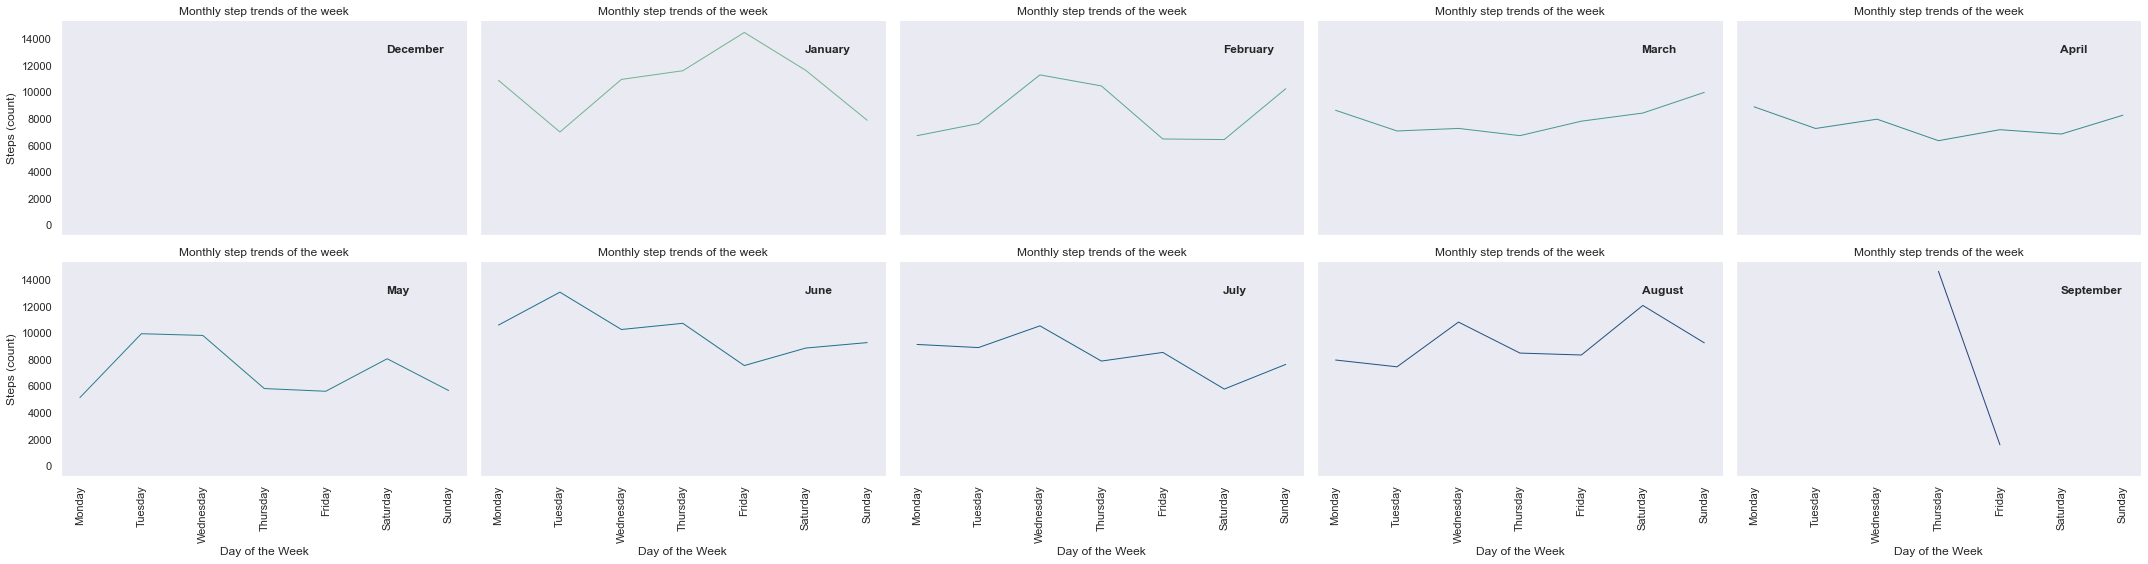

In [34]:
graphmonth(day)

In [35]:
# create figure
fig = go.Figure()

hm = day.groupby(['Month','WeekDay']).agg({'Steps': 'mean'}).reset_index()
hm = hm.pivot("Month", "WeekDay", "Steps")
# Add surface trace
fig.add_trace(go.Heatmap(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],y=['September','August','July','June','May','April','March','February','January','December'],z=hm, colorscale="YlGn"))

hm2 = day2.groupby(['Month','WeekDay']).agg({'Steps': 'mean'}).reset_index()
hm2 = hm2.pivot("Month", "WeekDay", "Steps")
# Add surface trace
fig.add_trace(go.Heatmap(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],y=['September','August','July','June','May','April','March','February','January','December'],z=hm2, colorscale="YlGn"))


hm3 = day3.groupby(['Month','WeekDay']).agg({'Steps': 'mean'}).reset_index()
hm3 = hm3.pivot("Month", "WeekDay", "Steps")
# Add surface trace
fig.add_trace(go.Heatmap(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],y=['September','August','July','June','May','April','March','February','January','December'],z=hm3, colorscale="YlGn"))

hm4 = day4.groupby(['Month','WeekDay']).agg({'Steps': 'mean'}).reset_index()
hm4 = hm4.pivot("Month", "WeekDay", "Steps")
# Add surface trace
fig.add_trace(go.Heatmap(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],y=['September','August','July','June','May','April','March','February','January','December'],z=hm4, colorscale="YlGn"))

hm5 = day5.groupby(['Month','WeekDay']).agg({'Steps': 'mean'}).reset_index()
hm5 = hm5.pivot("Month", "WeekDay", "Steps")
# Add surface trace
fig.add_trace(go.Heatmap(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],y=['September','August','July','June','May','April','March','February','January','December'],z=hm5, colorscale="YlGn"))

hm7 = day7.groupby(['Month','WeekDay']).agg({'Steps': 'mean'}).reset_index()
hm7 = hm7.pivot("Month", "WeekDay", "Steps")
# Add surface trace
fig.add_trace(go.Heatmap(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],y=['September','August','July','June','May','April','March','February','January','December'],z=hm7, colorscale="YlGn"))

hm8 = day8.groupby(['Month','WeekDay']).agg({'Steps': 'mean'}).reset_index()
hm8 = hm8.pivot("Month", "WeekDay", "Steps")
# Add surface trace
fig.add_trace(go.Heatmap(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],y=['September','August','July','June','May','April','March','February','January','December'],z=hm8, colorscale="YlGn"))

# fig.show()
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Participant 1",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Monthly Average Step count:"}]),
                dict(label="Participant 2",
                     method="update",
                     args=[{"visible": [False, True, False, False,False, False, False]},
                           {"title": "Monthly Average Step count:"}]),
                dict(label="Participant 3",
                     method="update",
                     args=[{"visible": [False, False, True, False,False, False, False]},
                           {"title": "Monthly Average Step count"}]),
                dict(label="Participant 4",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False, False]},
                           {"title": "Monthly Average Step count"}]),
                dict(label="Participant 5",
                     method="update",
                     args=[{"visible": [False, False, False, False, True,False,False]},
                           {"title": "Monthly Average Step count"}]),
                dict(label="Participant 7",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False]},
                           {"title": "Monthly Average Step count"}]),
                dict(label="Participant 8",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False,True]},
                           {"title": "Monthly Average Step count"}])
                
            ]),
        )
    ])


### What are the trends for different times of day across the week?

**Hypothesis**: I anticipate that most participants's step counts will typically peak in the morning as they commute to work/university or go for a morning run. I expect there will be another peak around lunchtime and the amount of step counts will wane towards the end of the day.  

For each participant, I will create an "hour" column to represent the starting time that the step counts for each hour was recorded.

In [36]:
# Author: Emily
# 24/10/22
p1['Hour'] = p1['Start'].dt.hour
p3['Hour'] = p3['Start'].dt.hour
p4['Hour'] = p4['Start'].dt.hour
p7['Hour'] = p7['Start'].dt.hour
p8['Hour'] = p8['Start'].dt.hour

These hours have been further broken down into the different times of day categorised as follows:
* "night" represents the period between the hours of 0 to 5 inclusive
* "morning" represents the period between the hours of 6 to 11 inclusive
* "afternoon" represents the period between the hours of 12 to 17 inclusive
* "evening" represents the period between the hours of 18 to 23 inclusive
    

The following plot shows the distribution of step counts for the different times of days across the week.

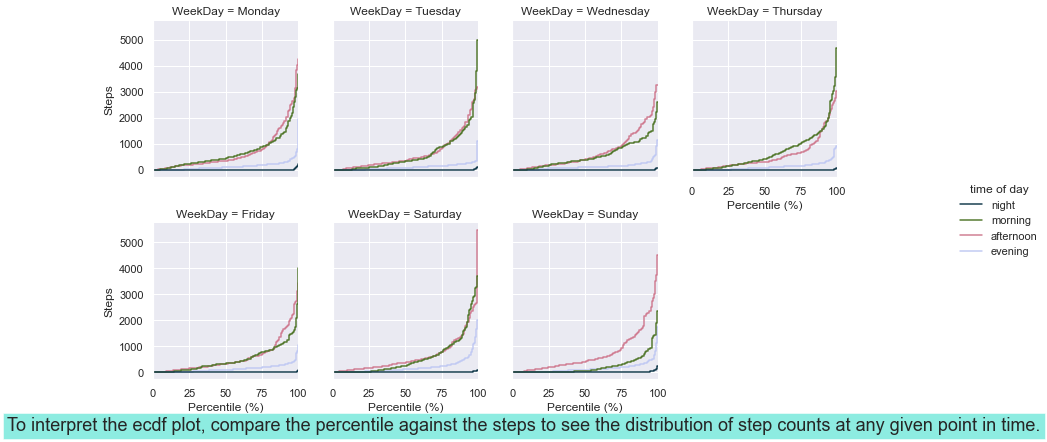

In [121]:
# Authors: Amelia, Emily
# 19/10/22 - 29/10/22
"""Function that outputs an ecdf plot for any given participant
    parameters: 
        df: a dataframe of the format p#, 
        where # is a number between 1 and 8 inclusive (not including 6)
            
"""
def graphHour(df):
    df["time of day"] = pd.qcut(df["Hour"], 4, labels = ["night", "morning", "afternoon", "evening"])
    sns.set(style="darkgrid") 
    plot = sns.displot(
        data=df, y="Steps", hue="time of day", col='WeekDay', col_wrap = 4,
        kind="ecdf", height=3, aspect=.9, palette="cubehelix"
    )
    
    plot.set_axis_labels("Percentile (%)") # set x labels
    """change number of sig figs for percentiles to be 1, 
    as the decimal representation (3 sig figs) unnecessarily shows too many zeroes
    when this level of detail is not needed and can be overwhelming visually.
    The percentage representation looks a lot less cluttered and makes the plot
    easier to interpret.
    """
    plot.set_xticklabels(['0','25','50','75','100'])
    # write the caption
    plt.figtext(0.5,10**-10, "To interpret the ecdf plot, compare the percentile "
    + "against the steps to see the distribution" +
    " of step counts at any given point in time.", ha="center", va="center", 
    fontsize=18, bbox={"facecolor":"#1cdac4", "alpha":0.5})

graphHour(p7)

Using participant 7 as an example, we can see that this participant is most noticeably most active on Sunday afternoons, followed by Thursday mornings. Although there are higher step counts recorded on Saturday afternoons and Tuesday mornings, they seem to account for a smaller proportion of step counts. Other than these observations, the trends appear to be fairly consistent throughout the week.

The ecdf plot contains lots of information that may be hard to absorb. The following heatmap uses colour to convey levels of fitness activity throughout the day, which may be better for a quick overview. 

In [1]:
# Authors: Amelia, Emily
# 19/10/22 - 29/10/22
"""Function that outputs a heatmap for any given participant
    parameters: 
        df: a dataframe of the format p#, 
        where # is a number between 1 and 8 inclusive (not including 6)
            
"""
def graphHour3(df):
    df["time of day"] = pd.qcut(df["Hour"], 4, labels = ["night", "morning", "afternoon", "evening"])
    # obtain the mean step counts for each hour of each day of the week
    hour_dow_count = df.groupby(['time of day','WeekDay']).agg({'Steps': 'mean'}).reset_index()
    # change the format such that each cell contains a step count value
    hour_dow_count = hour_dow_count.pivot("time of day", "WeekDay", "Steps")
    # change the order of the days of the week
    hour_dow_count = hour_dow_count.reindex(
        columns = [
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday'])
    # plot the heatmap
    hmap = sns.heatmap(hour_dow_count, cmap="coolwarm")
    # add label to colorbar
    cb = hmap.collections[0].colorbar
    cb.set_label('Steps (average)', labelpad=20)
    # write the caption
    plt.figtext(0.5,10**-10, "The mean step counts taken at any given time " + 
    "is indicated by the intensity of colour," +
    " where warmer colours represent higher step counts", ha="center", va="center", fontsize=12, 
    bbox={"facecolor":"#1cdac4", "alpha":0.5})
    
graphHour3(p1)

NameError: name 'p1' is not defined

Using participant 1 as an example, they are most active on Sunday afternoons and consistently average high step counts in the afternoon across the week. The mornings are generally unpredictable and evenings typically have lower step counts.

**Results:** I predicted that most participants are active in the mornings: this turned out not to be the case. The afternoons tend to have more step count activity. While nights are the most inactive period for most, there were some participants that recorded their highest step counts during this time. This could be due to these participants being in a different time zone or working late-night shifts. Overall, the most active times of day seem to be largely dependent on the individual and it is hard to make a blanket statement about the participants' activity levels across different times of day.

### Step Count Correlation with Weather

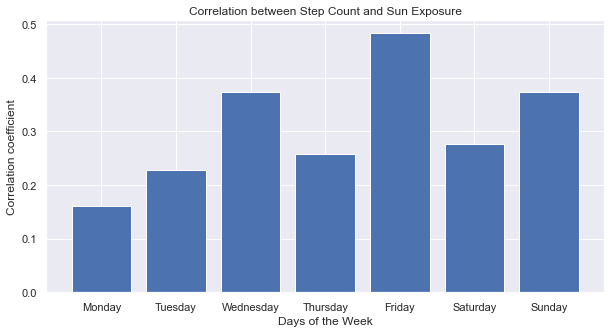

In [39]:
def graphsuncorr(df):
    test = pd.merge(df,sun[['Daily global solar exposure (MJ/m*m)','Date']],on='Date', how='left')
    t2 = test.groupby(['WeekDay','Week']).agg({'Steps':'mean','Daily global solar exposure (MJ/m*m)':'mean'}).reset_index()
    cor = {}
    m = t2.loc[t2['WeekDay']=='Monday']
    t = t2.loc[t2['WeekDay']=='Tuesday']
    w = t2.loc[t2['WeekDay']=='Wednesday']
    th = t2.loc[t2['WeekDay']=='Thursday']
    f = t2.loc[t2['WeekDay']=='Friday']
    s = t2.loc[t2['WeekDay']=='Saturday']
    sn = t2.loc[t2['WeekDay']=='Sunday']

    cor['Monday'] = m['Steps'].corr(m['Daily global solar exposure (MJ/m*m)'])
    cor['Tuesday'] = t['Steps'].corr(t['Daily global solar exposure (MJ/m*m)'])
    cor['Wednesday'] = w['Steps'].corr(w['Daily global solar exposure (MJ/m*m)'])
    cor['Thursday'] = th['Steps'].corr(th['Daily global solar exposure (MJ/m*m)'])
    cor['Friday'] = f['Steps'].corr(f['Daily global solar exposure (MJ/m*m)'])
    cor['Saturday'] = s['Steps'].corr(s['Daily global solar exposure (MJ/m*m)'])
    cor['Sunday'] = sn['Steps'].corr(sn['Daily global solar exposure (MJ/m*m)'])


    plt.rcParams["figure.figsize"] = (10,5)
    plt.bar(range(len(cor)), list(cor.values()), align='center')
    plt.xticks(range(len(cor)), list(cor.keys()))
    plt.xlabel('Days of the Week') 
    plt.ylabel('Correlation coefficient') 
    plt.title("Correlation between Step Count and Sun Exposure")
    plt.show()
    
# use day# to get correlation graph for participant    
graphsuncorr(day)

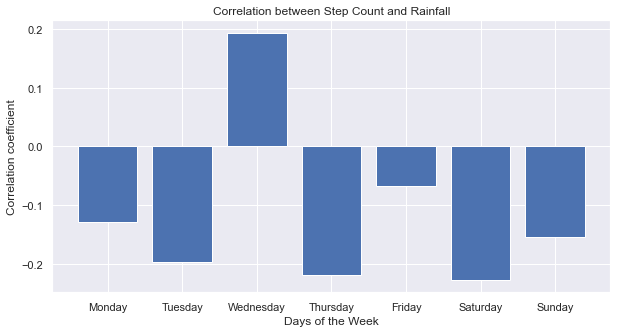

In [40]:
def graphrfcorr(df):
    test = pd.merge(df,sydrain[['Rainfall amount (millimetres)','Date']],on='Date', how='left')
    t2 = test.groupby(['WeekDay','Week']).agg({'Steps':'mean','Rainfall amount (millimetres)':'mean'}).reset_index()
    cor = {}
    m = t2.loc[t2['WeekDay']=='Monday']
    t = t2.loc[t2['WeekDay']=='Tuesday']
    w = t2.loc[t2['WeekDay']=='Wednesday']
    th = t2.loc[t2['WeekDay']=='Thursday']
    f = t2.loc[t2['WeekDay']=='Friday']
    s = t2.loc[t2['WeekDay']=='Saturday']
    sn = t2.loc[t2['WeekDay']=='Sunday']

    cor['Monday'] = m['Steps'].corr(m['Rainfall amount (millimetres)'])
    cor['Tuesday'] = t['Steps'].corr(t['Rainfall amount (millimetres)'])
    cor['Wednesday'] = w['Steps'].corr(w['Rainfall amount (millimetres)'])
    cor['Thursday'] = th['Steps'].corr(th['Rainfall amount (millimetres)'])
    cor['Friday'] = f['Steps'].corr(f['Rainfall amount (millimetres)'])
    cor['Saturday'] = s['Steps'].corr(s['Rainfall amount (millimetres)'])
    cor['Sunday'] = sn['Steps'].corr(sn['Rainfall amount (millimetres)'])


    plt.rcParams["figure.figsize"] = (10,5)
    plt.bar(range(len(cor)), list(cor.values()), align='center')
    plt.xticks(range(len(cor)), list(cor.keys()))
    plt.xlabel('Days of the Week') 
    plt.ylabel('Correlation coefficient') 
    plt.title("Correlation between Step Count and Rainfall")
    plt.show()
    
# use day# to get correlation graph for participant    
graphrfcorr(day7)

### How frequently does the participant reaches the recommended 7,500 and 10,000-step goal?

NameError: name 'weekdays' is not defined

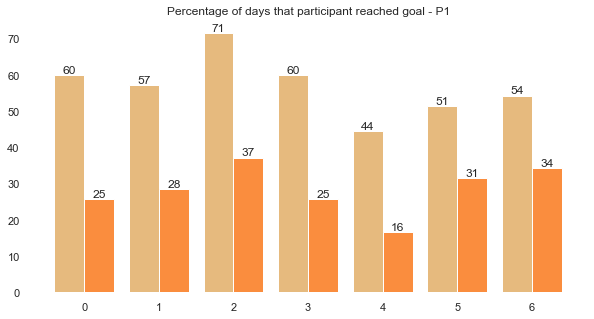

In [41]:
daily_sums_p1 = p1.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p2 = p2.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p3 = p3.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p4 = p4.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p5 = p5.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p7 = p7.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p8 = p8.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()

def plot_weekday_patterns(daily_sums, suffix):
    num_weekday_days = daily_sums.groupby('WeekDay').size()
    p_days_7500 = daily_sums[daily_sums['Steps'] > 7500].groupby('WeekDay').size() / num_weekday_days * 100
    p_days_10000 = daily_sums[daily_sums['Steps'] > 10000].groupby('WeekDay').size() / num_weekday_days * 100

    x = np.arange(7)
    width = 0.4

    fig, ax = plt.subplots()

    bar_7500 = ax.bar(x - width / 2, p_days_7500, width=width, color='#E6BA7E', label='>7,500')
    ax.bar_label(bar_7500, fmt='%d')
    bar_10000 = ax.bar(x + width / 2, p_days_10000, width=width, color='#FA8D3E', label='>10,000')
    ax.bar_label(bar_10000, fmt='%d')

    ax.set(frame_on=False)
    plt.title(f'Percentage of days that participant reached goal - {suffix}')
    plt.xticks(x, labels=weekdays)
    plt.legend()
    plt.show()

plot_weekday_patterns(daily_sums_p1, 'P1')

### What is the composition of activity for days of the week?

In [ ]:
def sub_q(df):
    df = df.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
    # df = df.assign(Health_index = lambda x: (x['Steps']))
    df.loc[df['Steps'] < 10000,'Step_index'] = '5k-10k'
    df.loc[df['Steps'] < 5000,'Step_index'] = '<5k'
    df.loc[df['Steps'] > 10000,'Step_index'] = '>10k'
    df = df[['WeekDay','Step_index']].copy()
    cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=False)
    df['WeekDay'] = df['WeekDay'].astype(cat_type)
    # grouped = df.groupby(by = ['Weekday','Step_index']).count()
    df = pd.get_dummies(df['Step_index']).groupby(df['WeekDay']).sum().reset_index()
    df = df.loc[:,['WeekDay','<5k','5k-10k','>10k']]
    df.plot(
        x = 'WeekDay',
        kind = 'barh',
        stacked = True,
        title = 'Percentage Stacked Bar Graph of Daily Step',
        mark_right = True)
    df_total = df['<5k'] + df['5k-10k'] + df['>10k']
    df_rel = df[df.columns[1:]].div(df_total, 0)*100

    for n in df_rel:
        for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                             df[n], df_rel[n])):
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                     va = 'center', ha = 'center')
    return df

sub_q(p1)

### Does inactivity differ weekday vs weekend?

In [ ]:


def graphinact(p):
    inact = p.copy()
    inact.loc[(inact['Steps'] <= 30) & (inact['Steps'] > 0 ), 'Inactive Hour'] = 1
    inact.loc[inact['Steps'] > 30, 'Inactive Hour'] = 0
    inact = inact.groupby(['Date'], as_index=False).agg({'Steps': 'sum','Inactive Hour':'sum','WeekDay': 'first','Month': 'first'})

    wkday = inact.groupby(['WeekDay']).agg({'Inactive Hour':'mean'}).reset_index()
    fig = px.bar(wkday, x='WeekDay', y='Inactive Hour',title="Inactivity over the days of the week")
    fig.show()

graphinact(p8)



# References
We report here relevant references:
1. https://www.folkstalk.com/2022/10/jupyter-ignore-warnings-with-code-examples.html#:~:text=How%20do%20you%20avoid%20warnings%20in%20Jupyter%20notebook%3F,3%3A%20Turn%20off%20warnings%20completely%20for%20the%20Notebook.
2. https://www.autoscripts.net/add-caption-to-plot-python/#adding-caption-below-x-axis-for-a-scatter-plot-using-matplotlib
3. https://stackoverflow.com/questions/52205416/moving-label-of-seaborn-colour-bar#:~:text=You%20can%20use%20ax.collections.colorbarto%20get%20access%20to%20the,colorbars%20label%2C%20and%20you%20can%20use%20the%20labelpad%3Dargument%3A
4. https://www.delftstack.com/howto/seaborn/set-axis-tick-labels-seaborn-python/
5. https://stats.stackexchange.com/questions/7129/should-percentages-be-reported-with-decimal-places